In [ ]:
#Importando as bibliotecas

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sf
import math

In [ ]:
#Declara as variaveis que vão ser utilizadas

In [68]:
X = np.zeros(4999)
Y = np.zeros(4999)
X2 = np.zeros(4999)
Y2 = np.zeros(4999)
Fs = 8000
Fc1 = float(1000/Fs)
Fc2 = float(2000/Fs)
tam = 100
H1 = np.zeros(tam)
H2 = np.zeros(tam)

In [ ]:
#Gerando os coeficientes

In [69]:
for i in range(len(H1)):
    if(i - tam/2) == 0:
        H1[i] = 2 * np.pi * Fc1
    if(i - tam/2) != 0:
        H1[i] = np.sin(2 * np.pi * Fc1 * (i - tam/2)) / (i - tam/2)
    H1[i] = H1[i] * (0.54 - 0.46 * np.cos(2 * numpy.pi * i / tam))

In [ ]:
# Em primeiro momento realiza a soma de todos os coeficientes
# Após isso ele divide os valores pelo valor da soma total
# Realiza a convolução

In [70]:
soma = 0

for i in range(len(H1)): 
    soma += H1[i]

for i in range(len(H1)):
    H1[i] = H1[i]/soma

for j in range(tam,4999):
    Y2[j] = 0
    for i in range(len(H1)):
        Y2[j] = Y2[j] + X2[j - i] * H1[i]

In [ ]:
#Calcula os coeficientes

In [71]:
for i in range(len(H2)):
    if(i - tam/2) == 0:
        H2[i] = 2 * np.pi * Fc2
    if(i - tam/2) != 0:
        H2[i] = np.sin(2 * np.pi * Fc2 * (i - tam/2)) / (i - tam/2)
    H2[i] = H2[i] * (0.54 - 0.46 * np.cos(2 * np.pi * i / tam))

In [ ]:
# Em primeiro momento realiza a soma de todos os coeficientes
# Após isso ele divide os valores pelo valor da soma total
# Realiza a convolução

In [72]:
soma = 0
for i in range(len(H2)): 
    soma += H2[i]

for i in range(len(H2)):
    H2[i] = H2[i]/soma

for j in range(tam,4999):
    Y[j] = 0
    for i in range(len(H2)):
        Y[j] = Y[j] + X[j - i] * H2[i]

In [73]:
for k in range(tam):
    H2[k] = H2[k] * -1
    if( k == tam/2):
        H2[k] +=1


for l in range(len(H2)):
        reject =  H2[l] + H1[l]
        H2[l] = reject

for k in range(len(H2)):
    H2[k] = H2[k] * -1
    if( k == tam/2):
        H2[k] += 1

In [ ]:
#Plotando o grafico

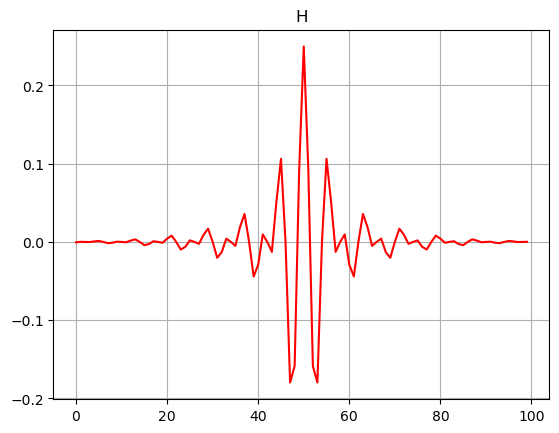

In [74]:
plt.title("H")
plt.plot(H2, 'r')
plt.grid()

In [75]:
#Grava os coeficientes em um arquivo existente
with open("coefSimu.dat", "w") as f:
    for s in H2:
        f.write(str(s) +",\n")

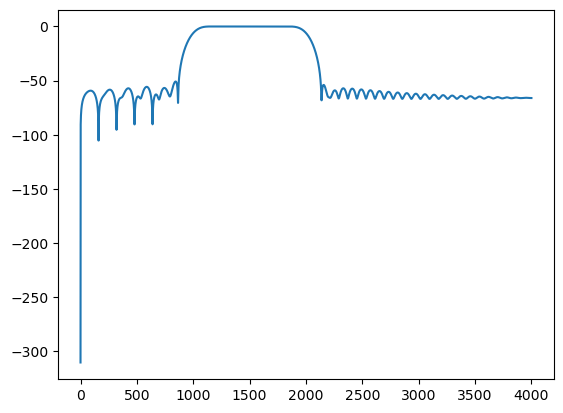

In [76]:
[w, H2] = sf.freqz(H2, 1, 8000)
plt.plot(w*8000/(2*np.pi), 20*np.log10(abs(H2)))
plt.show()